# Predict the demand for biking

## Step 0: Import libraries

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Step 1: Read the data

In [219]:
bikes=pd.read_csv('hour.csv')

In [220]:
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Step 2 : Prelim Analysis and Feature Selection

In [221]:
bikes2=bikes.copy()

In [222]:
bikes2=bikes2.drop(['instant','dteday','casual','registered'],axis=1)

In [223]:
bikes2

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


### Step 2.1 : Check null or missing values

In [224]:
bikes2.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Step 2.3:  Visualization of data using pandas histogram

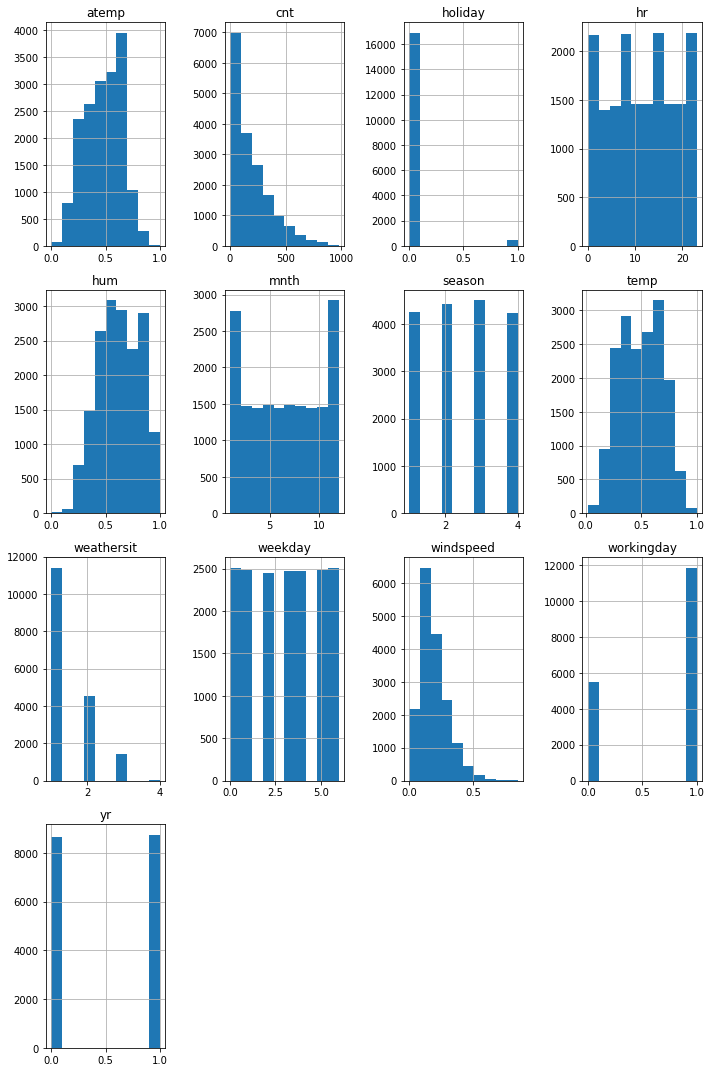

In [225]:
bikes2.hist(rwidth=10)

plt.rcParams["figure.figsize"] = (10,5)

plt.tight_layout()

### -We note that "cnt" ie. Demand is not normally distributed


## Step 3: Visualizing the data in different forms 

### Step 3.1: For Continuous variables

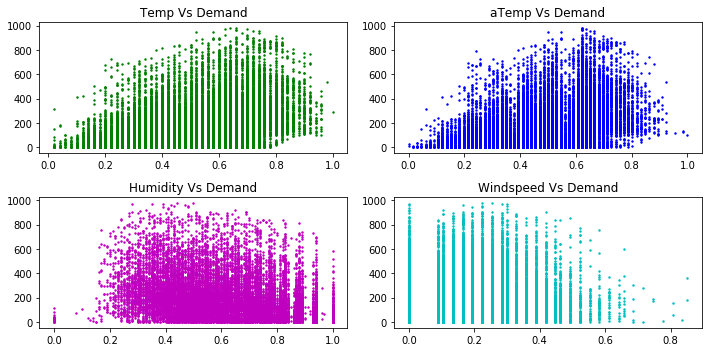

In [226]:
plt.subplot(2,2,1)

plt.title("Temp Vs Demand")

plt.scatter(bikes2['temp'],bikes2['cnt'],s=2,c='g')

plt.subplot(2,2,2)

plt.title("aTemp Vs Demand")

plt.scatter(bikes2['atemp'],bikes2['cnt'],s=2,c='b')

plt.subplot(2,2,3)

plt.title("Humidity Vs Demand")

plt.scatter(bikes2['hum'],bikes2['cnt'],s=2,c='m')

plt.subplot(2,2,4)

plt.title("Windspeed Vs Demand")

plt.scatter(bikes2['windspeed'],bikes2['cnt'],s=2,c='c')

plt.rcParams["figure.figsize"] = (10,5)

plt.tight_layout()


plt.show()

### - By visualizing we can say that Temp and aTemp may have a high correlation
### - We can also say that with increasing winndspeed after a certain point the demand may decrease.

### Step 3.2: For Categorical variables

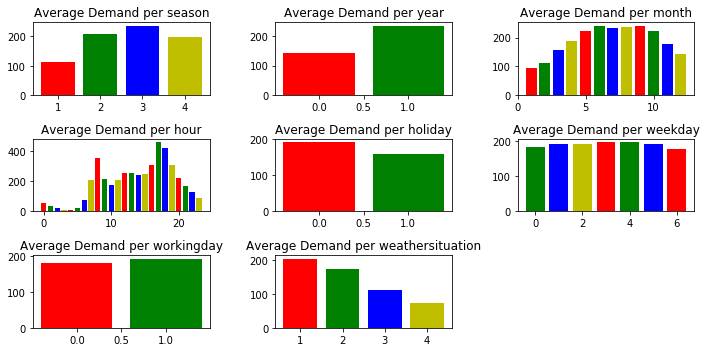

In [227]:
colors=['r','g','b','y']

plt.subplot(3,3,1)

plt.title('Average Demand per season')

cat_list=bikes2['season'].unique() #gets us unique values from column season

cat_avg=bikes2.groupby('season').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,2)

plt.title('Average Demand per year')

cat_list=bikes2['yr'].unique() #gets us unique values from column year

cat_avg=bikes2.groupby('yr').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,3)

plt.title('Average Demand per month')

cat_list=bikes2['mnth'].unique() #gets us unique values from column month

cat_avg=bikes2.groupby('mnth').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,4)

plt.title('Average Demand per hour')

cat_list=bikes2['hr'].unique() #gets us unique values from column hour

cat_avg=bikes2.groupby('hr').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,5)

plt.title('Average Demand per holiday')

cat_list=bikes2['holiday'].unique() #gets us unique values from column holiday

cat_avg=bikes2.groupby('holiday').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,6)

plt.title('Average Demand per weekday')

cat_list=bikes2['weekday'].unique() #gets us unique values from column weekday

cat_avg=bikes2.groupby('weekday').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,7)

plt.title('Average Demand per workingday')

cat_list=bikes2['workingday'].unique() #gets us unique values from column workingday

cat_avg=bikes2.groupby('workingday').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,8)

plt.title('Average Demand per weathersituation')

cat_list=bikes2['weathersit'].unique() #gets us unique values from column weathersituation

cat_avg=bikes2.groupby('weathersit').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.rcParams["figure.figsize"] = (10,15)

plt.tight_layout()






### - From the above graphs we can see that the feature weekday does not contribute to the demand and can be  dropped.
### - Drop the feature year as its limited to only 2 years.
### - Drop feature workingday as there is no sigificant change

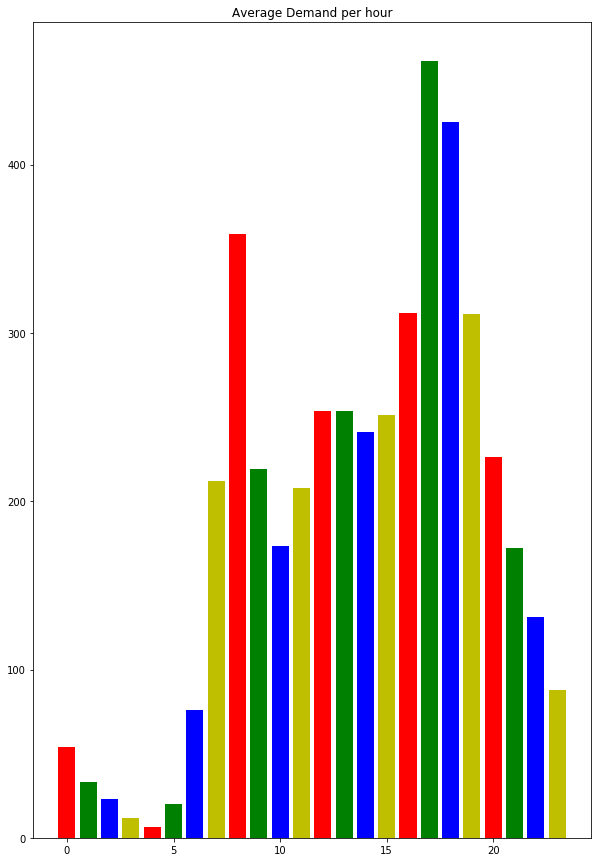

In [228]:
plt.title('Average Demand per hour')

cat_list=bikes2['hr'].unique() #gets us unique values from column hour

cat_avg=bikes2.groupby('hr').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.show()

### - We can say the bikes should be parked near public transports around 7:00 hours
### - And near offices aroud 17:00 hours

## Summarization of Data visulatization
## - Demand is not normally distributed
## - Temperature and Demand appears to have direct correlation
## - The plot for temp and atemp is almost identical plot
## - Humidity and Windspeed affect demand but need more statistical analysis

### Step 3.3: EDA

In [229]:
bikes2['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [230]:
bikes2['cnt'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

## Step 4: Check for Multiple Linear Regression Assumption

### Step 4.1 : Linearity using correlation coefficient matrix using corr 

In [231]:
correlation=bikes2[['temp','atemp','hum','windspeed','cnt']].corr()

In [232]:
correlation

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


## Step 5: Drop irrelevant features

### We are dropping atemp coz it violates the multicollinearity
### We also drop windspeed as it does not have a good correlatio with demand

In [233]:
bikes2=bikes2.drop(['weekday','yr','workingday','atemp','windspeed'],axis=1)

In [234]:
bikes2

,season,mnth,hr,holiday,weathersit,temp,windspeed,cnt
0,1,1,0,0,1,0.24,0.0000,16
1,1,1,1,0,1,0.22,0.0000,40
2,1,1,2,0,1,0.22,0.0000,32
3,1,1,3,0,1,0.24,0.0000,13
4,1,1,4,0,1,0.24,0.0000,1
5,1,1,5,0,2,0.24,0.0896,1
6,1,1,6,0,1,0.22,0.0000,2
7,1,1,7,0,1,0.20,0.0000,3
8,1,1,8,0,1,0.24,0.0000,8
9,1,1,9,0,1,0.32,0.0000,14


### Step 5.1: Check for autocorrelation in demand using the acorr plot

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1aa33490fd0>)

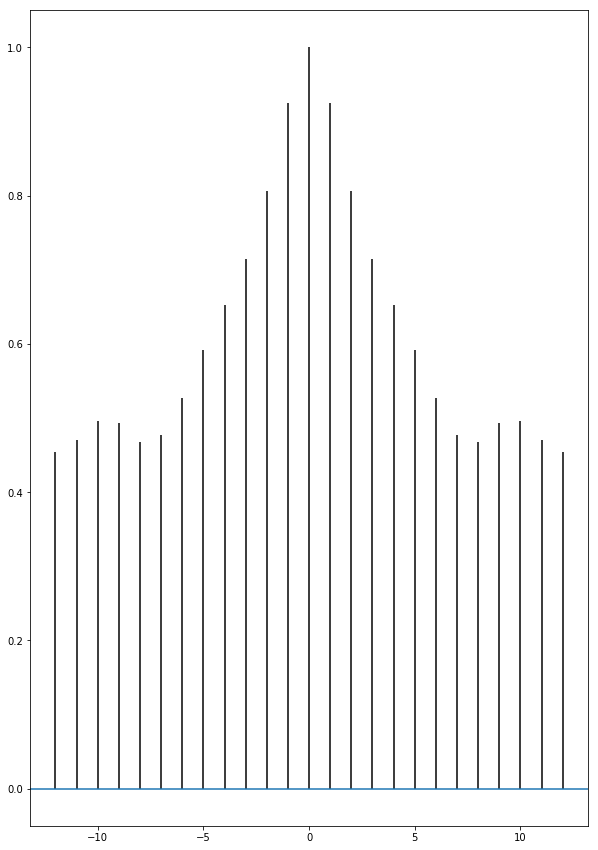

In [235]:
df1=pd.to_numeric(bikes2['cnt'],downcast='float') #convert to float

plt.acorr(df1,maxlags=12)

### - High autocorrelation in demand feature

## Step 6: Create or modify new features

### Step 6.1 Log normalize the feature demand

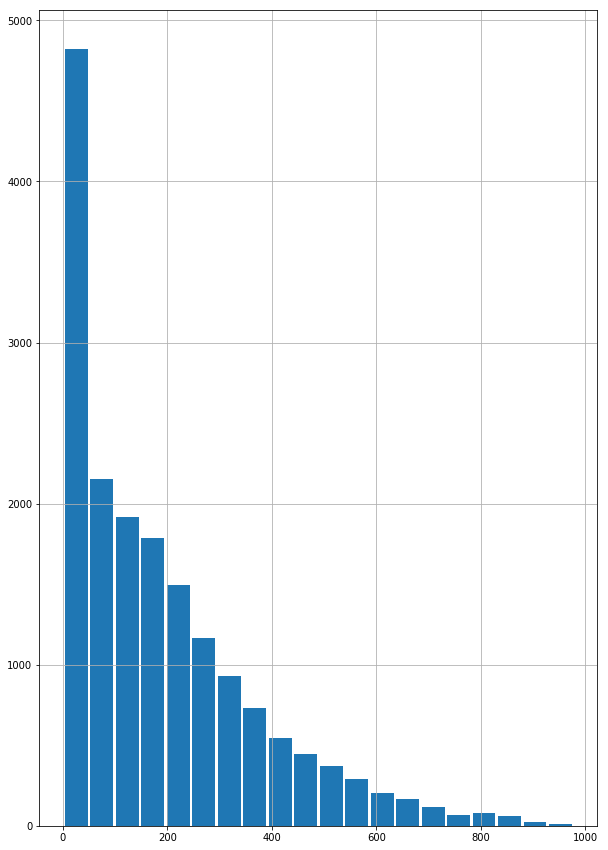

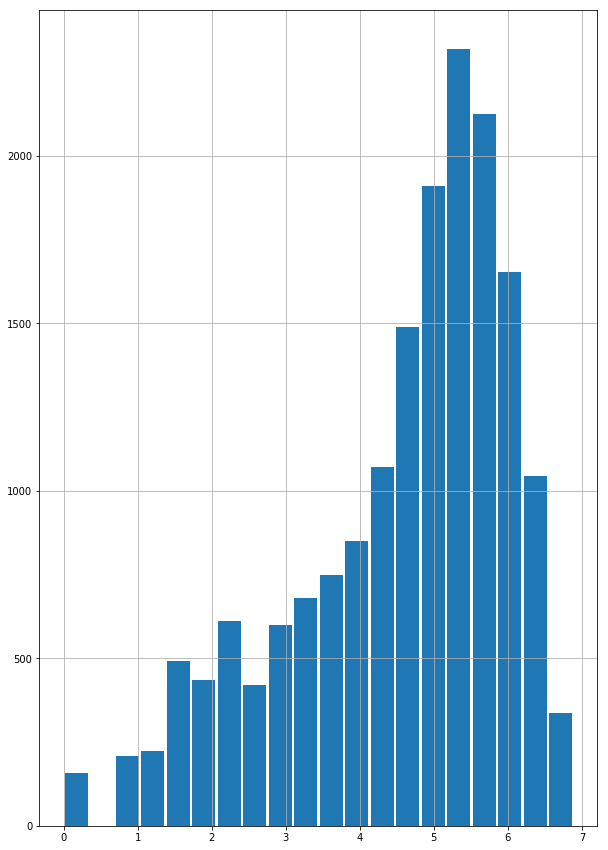

In [236]:
import numpy as np

df2=np.log(df1)

plt.figure()
df1.hist(rwidth=0.9,bins=20)

plt.figure()
df2.hist(rwidth=0.9,bins=20)



In [237]:
bikes2['cnt']=np.log(bikes2['cnt'])

In [238]:
bikes2

,season,mnth,hr,holiday,weathersit,temp,windspeed,cnt
0,1,1,0,0,1,0.24,0.0000,2.772589
1,1,1,1,0,1,0.22,0.0000,3.688879
2,1,1,2,0,1,0.22,0.0000,3.465736
3,1,1,3,0,1,0.24,0.0000,2.564949
4,1,1,4,0,1,0.24,0.0000,0.000000
5,1,1,5,0,2,0.24,0.0896,0.000000
6,1,1,6,0,1,0.22,0.0000,0.693147
7,1,1,7,0,1,0.20,0.0000,1.098612
8,1,1,8,0,1,0.24,0.0000,2.079442
9,1,1,9,0,1,0.32,0.0000,2.639057


### Step 6.2 Autocorrelation in demand column

In [239]:
t_1=bikes2['cnt'].shift(+1).to_frame()
t_1.columns=['t-1']

t_2=bikes2['cnt'].shift(+1).to_frame()
t_2.columns=['t-2']

t_3=bikes2['cnt'].shift(+1).to_frame()
t_3.columns=['t-3']

bikes2_lag=pd.concat([bikes2,t_1,t_2,t_3],axis=1)



In [240]:
bikes2_lag

,season,mnth,hr,holiday,weathersit,temp,windspeed,cnt,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.0000,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.0000,3.688879,2.772589,2.772589,2.772589
2,1,1,2,0,1,0.22,0.0000,3.465736,3.688879,3.688879,3.688879
3,1,1,3,0,1,0.24,0.0000,2.564949,3.465736,3.465736,3.465736
4,1,1,4,0,1,0.24,0.0000,0.000000,2.564949,2.564949,2.564949
5,1,1,5,0,2,0.24,0.0896,0.000000,0.000000,0.000000,0.000000
6,1,1,6,0,1,0.22,0.0000,0.693147,0.000000,0.000000,0.000000
7,1,1,7,0,1,0.20,0.0000,1.098612,0.693147,0.693147,0.693147
8,1,1,8,0,1,0.24,0.0000,2.079442,1.098612,1.098612,1.098612
9,1,1,9,0,1,0.32,0.0000,2.639057,2.079442,2.079442,2.079442


## The new 3 columns  will be required to predict the demand along with others

### Dropping NAN rows

In [241]:
bikes2_lag=bikes2_lag.dropna()

In [242]:
bikes2_lag

,season,mnth,hr,holiday,weathersit,temp,windspeed,cnt,t-1,t-2,t-3
1,1,1,1,0,1,0.22,0.0000,3.688879,2.772589,2.772589,2.772589
2,1,1,2,0,1,0.22,0.0000,3.465736,3.688879,3.688879,3.688879
3,1,1,3,0,1,0.24,0.0000,2.564949,3.465736,3.465736,3.465736
4,1,1,4,0,1,0.24,0.0000,0.000000,2.564949,2.564949,2.564949
5,1,1,5,0,2,0.24,0.0896,0.000000,0.000000,0.000000,0.000000
6,1,1,6,0,1,0.22,0.0000,0.693147,0.000000,0.000000,0.000000
7,1,1,7,0,1,0.20,0.0000,1.098612,0.693147,0.693147,0.693147
8,1,1,8,0,1,0.24,0.0000,2.079442,1.098612,1.098612,1.098612
9,1,1,9,0,1,0.32,0.0000,2.639057,2.079442,2.079442,2.079442
10,1,1,10,0,1,0.38,0.2537,3.583519,2.639057,2.639057,2.639057


## Step 7 : Create dummy variables and drop first to avoid dummy variables trap

In [243]:
bikes2_lag.dtypes

season          int64
mnth            int64
hr              int64
holiday         int64
weathersit      int64
temp          float64
windspeed     float64
cnt           float64
t-1           float64
t-2           float64
t-3           float64
dtype: object

In [244]:
# the column need to be of object type for dummy variables

bikes2_lag['season']=bikes2_lag['season'].astype('category')

bikes2_lag['mnth']=bikes2_lag['mnth'].astype('category')

bikes2_lag['hr']=bikes2_lag['hr'].astype('category')

bikes2_lag['holiday']=bikes2_lag['holiday'].astype('category')

bikes2_lag['weathersit']=bikes2_lag['weathersit'].astype('category')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [245]:
dummy_df=pd.get_dummies(bikes2_lag,drop_first=True)

In [246]:
dummy_df

,temp,windspeed,cnt,t-1,t-2,t-3,season_2,season_3,season_4,mnth_2,...,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,weathersit_2,weathersit_3,weathersit_4
1,0.22,0.0000,3.688879,2.772589,2.772589,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.22,0.0000,3.465736,3.688879,3.688879,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.24,0.0000,2.564949,3.465736,3.465736,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.0000,0.000000,2.564949,2.564949,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.0896,0.000000,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.0000,0.693147,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.0000,1.098612,0.693147,0.693147,0.693147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.24,0.0000,2.079442,1.098612,1.098612,1.098612,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.32,0.0000,2.639057,2.079442,2.079442,2.079442,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0.38,0.2537,3.583519,2.639057,2.639057,2.639057,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 8: Test train data split

    

### Would be different coz the target variable is time dependent so Autocollinearity comes in place

In [247]:
Y=bikes2_lag[['cnt']]
X=bikes2_lag.drop(['cnt'],axis=1)

In [248]:
X

,season,mnth,hr,holiday,weathersit,temp,windspeed,t-1,t-2,t-3
1,1,1,1,0,1,0.22,0.0000,2.772589,2.772589,2.772589
2,1,1,2,0,1,0.22,0.0000,3.688879,3.688879,3.688879
3,1,1,3,0,1,0.24,0.0000,3.465736,3.465736,3.465736
4,1,1,4,0,1,0.24,0.0000,2.564949,2.564949,2.564949
5,1,1,5,0,2,0.24,0.0896,0.000000,0.000000,0.000000
6,1,1,6,0,1,0.22,0.0000,0.000000,0.000000,0.000000
7,1,1,7,0,1,0.20,0.0000,0.693147,0.693147,0.693147
8,1,1,8,0,1,0.24,0.0000,1.098612,1.098612,1.098612
9,1,1,9,0,1,0.32,0.0000,2.079442,2.079442,2.079442
10,1,1,10,0,1,0.38,0.2537,2.639057,2.639057,2.639057


In [249]:
Y

,cnt
1,3.688879
2,3.465736
3,2.564949
4,0.000000
5,0.000000
6,0.693147
7,1.098612
8,2.079442
9,2.639057
10,3.583519


### Creating training set at 70% of total rows

In [250]:
tr_size=0.7*len(X)

In [251]:
tr_size

12164.599999999999

In [252]:
tr_size=int(tr_size)

In [253]:
tr_size

12164

In [254]:
X_train=X.values[0:tr_size]
X_test=X.values[tr_size:len(X)]

In [255]:
Y_train=Y.values[0:tr_size]
Y_test=Y.values[tr_size:len(Y)]

## Step 9 : Fit and Score the model

### Linear Regression

In [256]:
from sklearn.linear_model import LinearRegression

In [257]:
lr=LinearRegression()

In [258]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [259]:
r2_test=lr.score(X_test,Y_test)
r2_train=lr.score(X_train,Y_train) 

In [260]:
r2_test

0.8018813301844839

In [261]:
r2_train

0.787314081327171

In [262]:
y_pred=lr.predict(X_test)

In [263]:
y_pred

array([[4.29114769],
       [4.09700528],
       [3.67880782],
       ...,
       [4.51471941],
       [4.53536839],
       [4.23293926]])

In [264]:
from sklearn.metrics import mean_squared_error
import math

In [265]:
rmse=math.sqrt(mean_squared_error(Y_test,y_pred))

In [266]:
rmse

0.6351071658231201

### Calculate RMSLE

In [267]:
y_test_e=[]

y_pred_e=[]

for i in range(0,len(Y_test)):
    y_test_e.append(math.exp(Y_test[i]))
    y_pred_e.append(math.exp(y_pred[i]))
    

In [268]:
# Calculate the sum

log_sq_sum=0.0

for i in range(0,len(y_test_e)):
    log_a=math.log(y_test_e[i]+1)
    log_p=math.log(y_pred_e[i]+1)
    log_diff=(log_a-log_p)**2
    log_sq_sum=log_sq_sum+log_diff
    

In [269]:
rmsle=math.sqrt(log_sq_sum/len(Y_test))

In [270]:
rmsle

0.6098056172888143